### Baseline Classification Model ###


In [1]:
from datasets import load_dataset
full_dataset = load_dataset('csv', data_files= "final_dataset.csv")

/opt/anaconda3/envs/cs257_hw1/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 2843 examples [00:00, 10365.48 examples/s]


In [2]:
import pandas as pd
df = pd.read_csv("final_dataset.csv")
df = df.dropna()
df = df.rename(columns={"type": "label"})
df

,text,source,formality,label
0,delegation peru greatly pleased sir election p...,un_debates,formal,spoken
1,webvtt kind captions language en want video tr...,khan_academy,educational,spoken
2,congratulate mr president assuming responsible...,un_debates,formal,spoken
3,well called c chosen,telephone_convos,informal,spoken
4,regards janine cash vi confirmation request ka...,enron_emails,formal,written
...,...,...,...,...
2838,hi baby im sat bloody bus mo wont home wanna s...,sms,informal,written
2839,rents havent looked rents long time,telephone_convos,informal,spoken
2840,forgetting hurts knowing decision take sometim...,medium,semiformal,written
2841,created prototypes played friends encouraged t...,medium,semiformal,written


In [3]:
id2label = {0: "written", 1: "spoken"}
label2id = {"written": 0, "spoken": 1}
df["label"] = df["label"].map(label2id)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import numpy as np

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['text'])

#X = np.array(full_data)  # Your BERT embeddings
y = np.array(df['label'])     

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
classifier = LogisticRegression(random_state=42)
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.90      0.99      0.95       320
           1       0.99      0.86      0.92       248

    accuracy                           0.93       568
   macro avg       0.95      0.93      0.93       568
weighted avg       0.94      0.93      0.93       568



## Baseline Visualization

/opt/anaconda3/envs/cs257_hw1/lib/python3.11/site-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


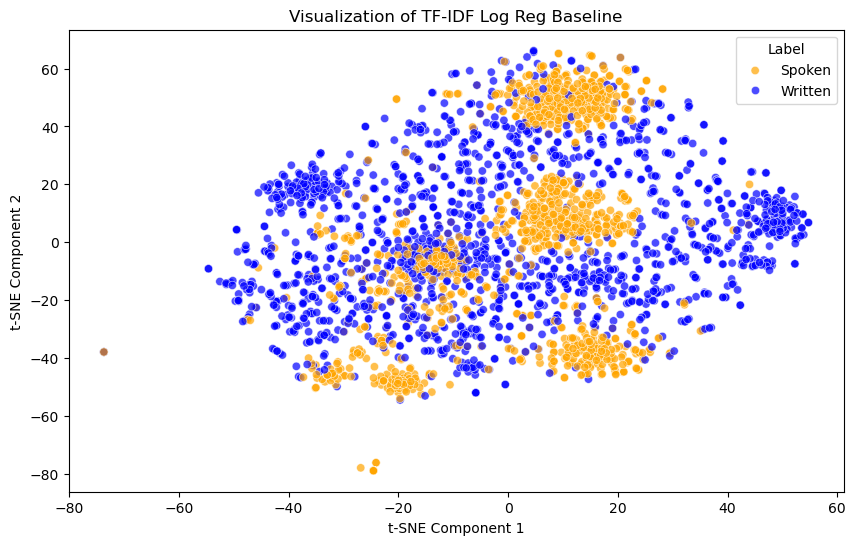

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

# ✅ Step 1: Convert sparse TF-IDF matrix to dense format for t-SNE
X_dense = X.toarray()

# ✅ Step 2: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_dense)

# ✅ Step 3: Create a scatter plot to visualize t-SNE embeddings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df['label'], palette=["blue", "orange"], alpha=0.7)

plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("Visualization of TF-IDF Log Reg Baseline")
plt.legend(title="Label", labels=["Spoken", "Written"])
plt.show()
